Sheets loaded successfully.
Cronbach Alpha:
Peer Pressure: 0.9152581180151117
Grit: 0.9368847568916938
FoMO: nan

Descriptive Statistics:
       PeerPressure_Total  Grit_Total  FoMO_Total
count          323.000000  323.000000  323.000000
mean            22.631579   42.869969  102.687307
std              8.949680    6.512897   48.365887
min              8.000000   10.000000   31.000000
25%             15.500000   39.000000   64.000000
50%             22.000000   44.000000   90.000000
75%             29.500000   48.000000  140.000000
max             40.000000   50.000000  234.000000


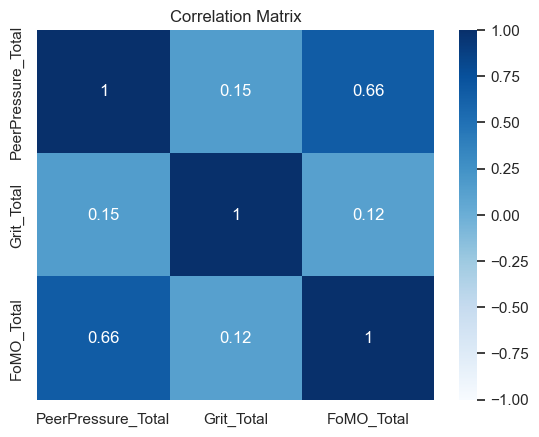


Correlation Table:
                    PeerPressure_Total  Grit_Total  FoMO_Total
PeerPressure_Total            1.000000    0.152355    0.662831
Grit_Total                    0.152355    1.000000    0.119765
FoMO_Total                    0.662831    0.119765    1.000000

T-Test: Grit by FoMO Group
TtestResult(statistic=1.2662300531345427, pvalue=0.2063638959966044, df=315.8185304658991)

T-Test: Grit by Peer Pressure Group
TtestResult(statistic=1.405949969999106, pvalue=0.16075986162021083, df=304.11226293561305)

Regression Path A: FoMO → Grit
                            OLS Regression Results                            
Dep. Variable:             Grit_Total   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.671
Date:                Mon, 17 Nov 2025   Prob (F-statistic):             0.0314
Time:                        18:57:36   Log-Likelihoo

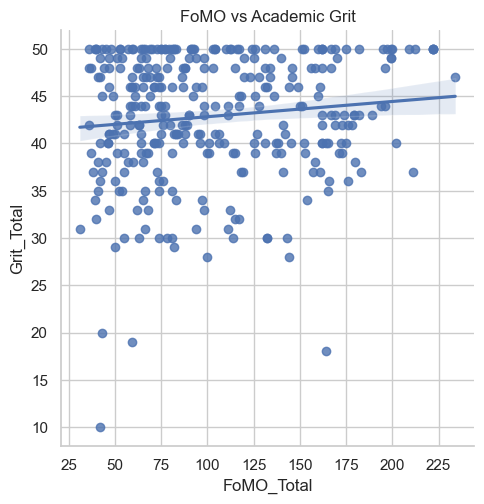

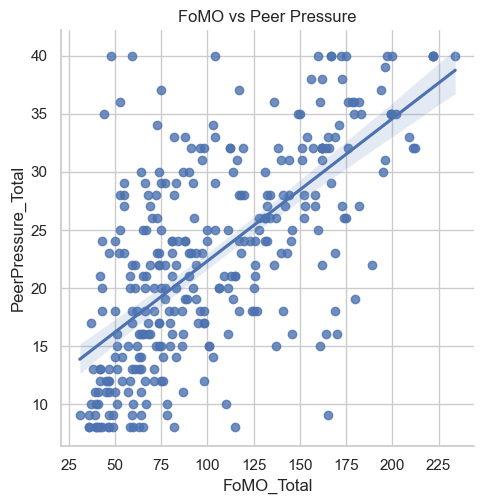

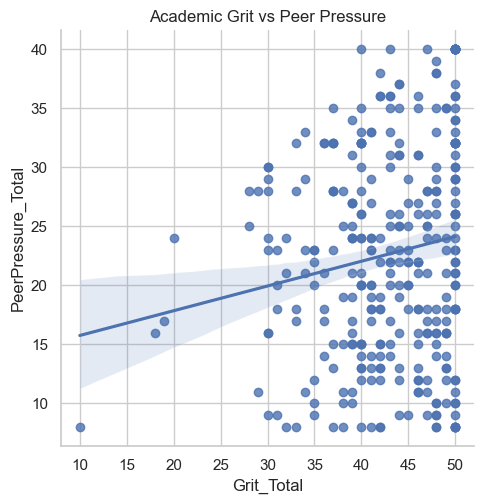

In [13]:
# ============================================================
# 0. IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.mediation import Mediation

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


# ============================================================
# 1. LOAD ALL SHEETS
# ============================================================
fomo_df = pd.read_excel("dataset.xlsx", sheet_name="FoMO")
peer_df = pd.read_excel("dataset.xlsx", sheet_name="Peer Pressure")
grit_df = pd.read_excel("dataset.xlsx", sheet_name="Academic Grit")

print("Sheets loaded successfully.")


# ============================================================
# 2. FIX ENCODING PROBLEMS & CONVERT TO NUMERIC
# ============================================================
def clean_numeric(df):
    df = df.apply(lambda col: pd.to_numeric(col, errors='coerce'))
    return df

fomo_df_clean = clean_numeric(fomo_df)
peer_df_clean = clean_numeric(peer_df)
grit_df_clean = clean_numeric(grit_df)


# ============================================================
# 3. DEFINE COLUMN LISTS EXACTLY AS PROVIDED
# ============================================================

# Peer Pressure (8 items)
peer_pressure_cols = [
    'If my friends raise a toast, it would be hard for me to say no.\xa0',
    'At times, I’ve consumed alcohol because my friends urged me to.',
    'I often feel pressured to drink when I normally would not drink.',
    'If my friends are drinking, it would be hard for me to resist having a drink.',
    'I’ve felt pressured to get drunk at parties.',
    'If my best friend offered toast, it would be hard for me to refuse drinking alcohol.',
    'At times I have drink alcohol because my best friend urged me to.',
    'If my best friend urged me to get drunk at a party I would have a drink.'
]

# Academic Grit (10 items)
grit_cols = [
    'I push myself to do my personal best in school.',
    'I work toward my academic goals no matter how long they take to reach.',
    'Even when I could do something more fun, I give schoolwork my best effort.',
    'I complete my schoolwork no matter how difficult it is.',
    'I am determined to give my best effort in schoolwork.',
    'Once I set a goal in school, I try to overcome any challenges that arise.',
    'I am able to balance working hard in school with my other hobbies and interests.',
    'Even if I am struggling in school, I keep trying my best.',
    'When it comes to completing work in school, I always try my hardest.',
    'In school, I work hard to achieve challenging goals.'
]

# FoMO (35 items) — EXACTLY as found in your dataset
fomo_cols = list(fomo_df_clean.columns)  # already verified


# Reverse-coded FoMO items
reverse_fomo = [
    "Alcohol use reduces my enjoyment at parties (Reverse coded).",
    "I believe people can have as much fun without alcohol (Reverse coded)."
]


# ============================================================
# 4. REVERSE SCORE FOMO ITEMS (Likert 1-5)
# ============================================================
for col in reverse_fomo:
    if col in fomo_df_clean.columns:
        fomo_df_clean[col] = 6 - fomo_df_clean[col]


# ============================================================
# 5. COMPUTE TOTAL SCORES
# ============================================================
peer_total = peer_df_clean[peer_pressure_cols].sum(axis=1)
grit_total = grit_df_clean[grit_cols].sum(axis=1)
fomo_total = fomo_df_clean[fomo_cols].sum(axis=1)

combined_df = pd.DataFrame({
    "PeerPressure_Total": peer_total,
    "Grit_Total": grit_total,
    "FoMO_Total": fomo_total
}).dropna()

combined_df.head()


# ============================================================
# 6. CRONBACH'S ALPHA
# ============================================================
def cronbach_alpha(df):
    df_corr = df.corr()
    n = len(df_corr)
    mean_corr = df_corr.values[np.triu_indices(n, 1)].mean()
    return (n * mean_corr) / (1 + (n - 1) * mean_corr)

print("Cronbach Alpha:")
print("Peer Pressure:", cronbach_alpha(peer_df_clean[peer_pressure_cols]))
print("Grit:", cronbach_alpha(grit_df_clean[grit_cols]))
print("FoMO:", cronbach_alpha(fomo_df_clean[fomo_cols]))


# ============================================================
# 7. DESCRIPTIVE STATISTICS
# ============================================================
print("\nDescriptive Statistics:")
print(combined_df.describe())


# ============================================================
# 8. CORRELATIONS + HEATMAP
# ============================================================
corr = combined_df.corr()
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

print("\nCorrelation Table:")
print(corr)


# ============================================================
# 9. GROUP SPLITS (Median)
# ============================================================
combined_df["FoMO_Group"] = np.where(
    combined_df["FoMO_Total"] >= combined_df["FoMO_Total"].median(),
    "High FoMO", "Low FoMO"
)

combined_df["Peer_Group"] = np.where(
    combined_df["PeerPressure_Total"] >= combined_df["PeerPressure_Total"].median(),
    "High Peer", "Low Peer"
)


# ============================================================
# 10. T-TESTS
# ============================================================
print("\nT-Test: Grit by FoMO Group")
print(stats.ttest_ind(
    combined_df[combined_df["FoMO_Group"]=="High FoMO"]["Grit_Total"],
    combined_df[combined_df["FoMO_Group"]=="Low FoMO"]["Grit_Total"],
    equal_var=False
))

print("\nT-Test: Grit by Peer Pressure Group")
print(stats.ttest_ind(
    combined_df[combined_df["Peer_Group"]=="High Peer"]["Grit_Total"],
    combined_df[combined_df["Peer_Group"]=="Low Peer"]["Grit_Total"],
    equal_var=False
))


# ============================================================
# 11. REGRESSION MODELS (Paths A, B, C')
# ============================================================
print("\nRegression Path A: FoMO → Grit")
print(smf.ols("Grit_Total ~ FoMO_Total", data=combined_df).fit().summary())

print("\nRegression Path C: FoMO → Peer Pressure")
print(smf.ols("PeerPressure_Total ~ FoMO_Total", data=combined_df).fit().summary())

print("\nRegression Path B + C': Grit + FoMO → Peer Pressure")
print(smf.ols("PeerPressure_Total ~ Grit_Total + FoMO_Total", data=combined_df).fit().summary())


# ============================================================
# 12. MEDIATION ANALYSIS (Bootstrap)
# ============================================================
med_model = smf.ols("Grit_Total ~ FoMO_Total", data=combined_df)
out_model = smf.ols("PeerPressure_Total ~ Grit_Total + FoMO_Total", data=combined_df)

med = Mediation(out_model, med_model, "FoMO_Total", "Grit_Total")
med_results = med.fit(n_rep=5000)

print("\nMediation Analysis Results:")
print(med_results.summary())


# ============================================================
# 13. VISUALIZATIONS
# ============================================================
sns.lmplot(x="FoMO_Total", y="Grit_Total", data=combined_df)
plt.title("FoMO vs Academic Grit")
plt.show()

sns.lmplot(x="FoMO_Total", y="PeerPressure_Total", data=combined_df)
plt.title("FoMO vs Peer Pressure")
plt.show()

sns.lmplot(x="Grit_Total", y="PeerPressure_Total", data=combined_df)
plt.title("Academic Grit vs Peer Pressure")
plt.show()


In [12]:
import pandas as pd
xls = pd.ExcelFile("dataset.xlsx")
xls.sheet_names

peer_df = pd.read_excel("dataset.xlsx", sheet_name="Peer Pressure")
list(peer_df.columns)




['Unnamed: 0',
 'If my friends raise a toast, it would be hard for me to say no.\xa0',
 'At times, I’ve consumed alcohol because my friends urged me to.',
 'I often feel pressured to drink when I normally would not drink.',
 'If my friends are drinking, it would be hard for me to resist having a drink.',
 'I’ve felt pressured to get drunk at parties.',
 'If my best friend offered toast, it would be hard for me to refuse drinking alcohol.',
 'At times I have drink alcohol because my best friend urged me to.',
 'If my best friend urged me to get drunk at a party I would have a drink.']

In [11]:
grit_df = pd.read_excel("dataset.xlsx", sheet_name="Academic Grit")
list(grit_df.columns)



['Full Name (Last Name, First Name)',
 'I push myself to do my personal best in school.',
 'I work toward my academic goals no matter how long they take to reach.',
 'Even when I could do something more fun, I give schoolwork my best effort.',
 'I complete my schoolwork no matter how difficult it is.',
 'I am determined to give my best effort in schoolwork.',
 'Once I set a goal in school, I try to overcome any challenges that arise.',
 'I am able to balance working hard in school with my other hobbies and interests.',
 'Even if I am struggling in school, I keep trying my best.',
 'When it comes to completing work in school, I always try my hardest.',
 'In school, I work hard to achieve challenging goals.']

In [14]:
import pandas as pd
import numpy as np

# Load FoMO sheet
fomo_df = pd.read_excel("dataset.xlsx", sheet_name="FoMO")

print("=== RAW FoMO Columns ===")
print(list(fomo_df.columns))


# ============================================================
# 1. CHECK FOR COMPLETELY EMPTY OR NAMED "Unnamed" COLUMNS
# ============================================================
empty_cols = [col for col in fomo_df.columns if fomo_df[col].isna().all()]
unnamed_cols = [col for col in fomo_df.columns if "Unnamed" in col]

print("\n=== Empty Columns ===")
print(empty_cols)

print("\n=== Unnamed / Possibly Accidental Columns ===")
print(unnamed_cols)


# ============================================================
# 2. CHECK NON-NUMERIC VALUES PER COLUMN
# ============================================================
print("\n=== Checking Non-Numeric Values in Each Item ===")
for col in fomo_df.columns:
    non_numeric = fomo_df[col].apply(lambda x: not pd.to_numeric(x, errors='coerce') == pd.to_numeric(x, errors='coerce')).sum()
    print(f"{col}: {non_numeric} non-numeric entries")


# ============================================================
# 3. CHECK COLUMNS WITH ZERO VARIANCE
# ============================================================
print("\n=== Checking for Zero-Variance Columns ===")
for col in fomo_df.columns:
    if fomo_df[col].nunique(dropna=True) <= 1:
        print(f"Zero-variance (or constant) column: {col}")


# ============================================================
# 4. CONVERT TO NUMERIC AND CHECK FOR ROWS THAT FAIL
# ============================================================
fomo_numeric = fomo_df.apply(lambda col: pd.to_numeric(col, errors='coerce'))

print("\n=== Numeric Conversion Summary ===")
print(fomo_numeric.info())


# Rows with any NaN after conversion
bad_rows = fomo_numeric.isna().any(axis=1).sum()
print(f"\nRows containing missing or non-numeric values after conversion: {bad_rows}")


# ============================================================
# 5. CHECK FOR ENCODING ISSUES (SPECIAL CHARACTERS, \x92, \xa0, etc.)
# ============================================================
print("\n=== Encoding Diagnostics ===")
problem_cols = []
for col in fomo_df.columns:
    if any(char in col for char in ["\xa0", "\x92", "\x93", "\x94"]):
        problem_cols.append(col)

print("Columns with hidden/encoding characters:")
for col in problem_cols:
    print(repr(col))


# ============================================================
# 6. TRY COMPUTING VARIANCE AND COVARIANCE MANUALLY
# (If this fails, alpha becomes NaN)
# ============================================================
print("\n=== Variance per Column ===")
print(fomo_numeric.var())

print("\n=== Attempting Covariance Matrix Calculation ===")
try:
    cov = fomo_numeric.cov()
    print("Covariance matrix computed successfully.")
except Exception as e:
    print("Error computing covariance matrix:", e)


# ============================================================
# 7. ATTEMPT CRONBACH ALPHA MANUALLY AND SEE WHERE IT FAILS
# ============================================================
def cronbach_alpha(df):
    df = df.dropna(axis=1, how='all')  # remove completely empty cols
    df = df.dropna()  # drop rows with missing values

    k = df.shape[1]
    variances = df.var(axis=0)
    total_var = df.sum(axis=1).var()

    alpha = (k / (k - 1)) * (1 - variances.sum() / total_var)
    return alpha

try:
    alpha_test = cronbach_alpha(fomo_numeric)
    print("\n=== Cronbach Alpha Computation Result ===")
    print(alpha_test)
except Exception as e:
    print("\nCronbach alpha failed due to:", e)


# ============================================================
# 8. IDENTIFY EXACT ITEMS BREAKING ALPHA (VARIANCE OR NAN)
# ============================================================
print("\n=== Diagnostic: Columns with missing values or no variance ===")
for col in fomo_numeric.columns:
    if fomo_numeric[col].isna().sum() > 0:
        print(f"Missing values detected in: {col}")
    if fomo_numeric[col].nunique() <= 1:
        print(f"No variance detected in: {col}")

print("\n=== End of FoMO Scale Diagnostic ===")


=== RAW FoMO Columns ===
['Full Name (Last Name, First Name)', 'It bothers me when I miss an opportunity to drink alcohol with friends.', 'It disturbs me when I miss a drinking party with friends.', 'I feel that I miss out when I don’t drink, given the opportunity.', 'I regret it when I miss a drinking party or gathering with friends.', 'I get jealous when my friends are having fun drinking without me.', 'I worry that others are having more rewarding experiences as a result of drinking.', 'I drink because I worry about being left out.', 'I drink at parties because I worry about missing out on the fun.', 'It is important to participate in the drinking games my peers are having.', 'I get the urge to participate whenever my friends play drinking games.', 'I feel like missing out when not joining my friends in the drinking games.', 'I get upset when I am not allowed into a drinking party.', 'I get disappointed when parties turn out to be alcohol-free.', 'I need alcohol to have fun at parti